# Проект - анализ рекламных источников мобильной игры

## Материалы:
* [Презентация](https://drive.google.com/file/d/1Jobr5yr1OGvmtvylozp_MCV3WcI0pBKB/view?usp=sharing)
* [Дашборд](https://public.tableau.com/views/DashboardGameaboutspace/Dashboard1?:language=en-US&:display_count=n&:origin=viz_share_link) 

**Цель исследования** - проанализировать поведение игроков в зависимости от источника перехода для оптимизации расходов на маркетинг. 

## Ход проекта (декомпозиция)

### Шаг 1. Открытие и изучение данных

### Шаг 2. Предобработка данных

#### Проверка на дубликаты
    
#### Работа с датами
    
#### Работа с пропусками и аномалиями

### Шаг 3. Исследовательский анализ данных

####  Анализ рекламных источников по количеству новых пользователей
    
####  Анализ рекламных источников по затратам 
    
#### Анализ рекламных источников по способу прохождения уровня

#### Анализ рекламных источников по количеству построенных объектов

#### Анализ рекламных источников по времени прохождения уровня
     
#### Ранжирование каналов привлечения
    
### Шаг 4. Проверка статистических гипотез

####  Проверка гипотезы 1: Время завершения уровня различается в зависимости от способа прохождения:
   
##### - через реализацию проекта,
##### - через победу над первым игроком.
    
####  Проверка гипотезы 2: Количество построенных объектов различается в зависимости от способа прохождения:
   
##### - через реализацию проекта,
##### - через победу над первым игроком.


### Шаг 5.  Выводы и рекомендации

### Шаг 1. Открытие и изучение данных

In [1]:
import pandas as pd 
import datetime
from datetime import datetime, timedelta
import seaborn as sns
from datetime import date
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt 
import scipy.stats as stats
from cmath import sqrt
from plotly import graph_objects as go
from statsmodels.stats.proportion import proportions_ztest

In [2]:
user_sourse = pd.read_csv('user_source.csv')
costs = pd.read_csv('ad_costs.csv') 
game_actions = pd.read_csv('game_actions.csv')

In [3]:
user_sourse.info()
user_sourse.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13576 entries, 0 to 13575
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  13576 non-null  object
 1   source   13576 non-null  object
dtypes: object(2)
memory usage: 212.2+ KB


,user_id,source
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,facebook_ads
1,00151b4f-ba38-44a8-a650-d7cf130a0105,yandex_direct
2,001aaea6-3d14-43f1-8ca8-7f48820f17aa,youtube_channel_reklama
3,001d39dc-366c-4021-9604-6a3b9ff01e25,instagram_new_adverts
4,002f508f-67b6-479f-814b-b05f00d4e995,facebook_ads


In [4]:
costs.info()
costs.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   source  28 non-null     object 
 1   day     28 non-null     object 
 2   cost    28 non-null     float64
dtypes: float64(1), object(2)
memory usage: 800.0+ bytes


,source,day,cost
0,facebook_ads,2020-05-03,935.882786
1,facebook_ads,2020-05-04,548.354480
2,facebook_ads,2020-05-05,260.185754
3,facebook_ads,2020-05-06,177.982200
4,facebook_ads,2020-05-07,111.766796


In [5]:
game_actions.info()
game_actions.head()
print()
print('Количество уникальных пользователей: ', game_actions['user_id'].nunique())
print('Количество сессий: ', len(game_actions['event_datetime']))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135640 entries, 0 to 135639
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   event_datetime  135640 non-null  object
 1   event           135640 non-null  object
 2   building_type   127957 non-null  object
 3   user_id         135640 non-null  object
 4   project_type    1866 non-null    object
dtypes: object(5)
memory usage: 5.2+ MB

Количество уникальных пользователей:  13576
Количество сессий:  135640


In [6]:
game_actions['event'].value_counts()

building            127957
finished_stage_1      5817
project               1866
Name: event, dtype: int64

In [7]:
game_actions['building_type'].value_counts()

spaceport          59325
assembly_shop      54494
research_center    14138
Name: building_type, dtype: int64

In [8]:
game_actions['project_type'].value_counts()

satellite_orbital_assembly    1866
Name: project_type, dtype: int64

В наших данных о первом уровне игры на текущий момент есть только тип проекта - satellite_orbital_assembly.

In [9]:
user_sourse['source'].value_counts() 

yandex_direct              4817
instagram_new_adverts      3347
facebook_ads               2726
youtube_channel_reklama    2686
Name: source, dtype: int64

In [10]:
game_actions['event'].value_counts()

building            127957
finished_stage_1      5817
project               1866
Name: event, dtype: int64

In [11]:
game_actions.isna().sum()

event_datetime         0
event                  0
building_type       7683
user_id                0
project_type      133774
dtype: int64

**Вывод:** 

Мы изучили данные и видим, что у нас есть 4 основных рекламных канала:
* яндекс.директ 
* инстаграм
* фейсбук
* ютуб

На текущий момент игроки могут завершить только один проект -  satellite_orbital_assembly, игроков, завершивших уровень через реализацию проекта -  1866. 

Количество уникальных пользователей:  13576

Количество событий:  135640

Теперь можем приступать к следующему шагу - необходимо привести работу с датами, проверить данные на дубликаты, проверить -соблюдена ли логика пропусков и есть ли в данных аномалии. 

### Шаг 2. Предобработка данных

#### Проверка на дубликаты

In [12]:
print('В user_sourse:', user_sourse.duplicated().sum(), 'дубликатов')
print('В game_actions:', game_actions.duplicated().sum(), 'дубликатов')
print('В costs:', costs.duplicated().sum(), 'дубликатов')

В user_sourse: 0 дубликатов
В game_actions: 1 дубликатов
В costs: 0 дубликатов


Удалим дубликат:

In [13]:
game_actions = game_actions.drop_duplicates()
game_actions.duplicated().sum()

0

#### Работа с датами

In [14]:
costs['day'] = pd.to_datetime(costs['day'])
game_actions['event_datetime'] =  pd.to_datetime(game_actions['event_datetime'])
print('Минимальная дата клика:', costs['day'].min().strftime('%d.%m.%y'))
print('Максимальная дата клика:', costs['day'].max().strftime('%d.%m.%y'))
print()
print('Минимальная дата события:', game_actions['event_datetime'].min().strftime('%d.%m.%y'))
print('Максимальная дата события:', game_actions['event_datetime'].max().strftime('%d.%m.%y'))

Минимальная дата клика: 03.05.20
Максимальная дата клика: 09.05.20

Минимальная дата события: 04.05.20
Максимальная дата события: 05.06.20


Посмотрим количество событий по дням:

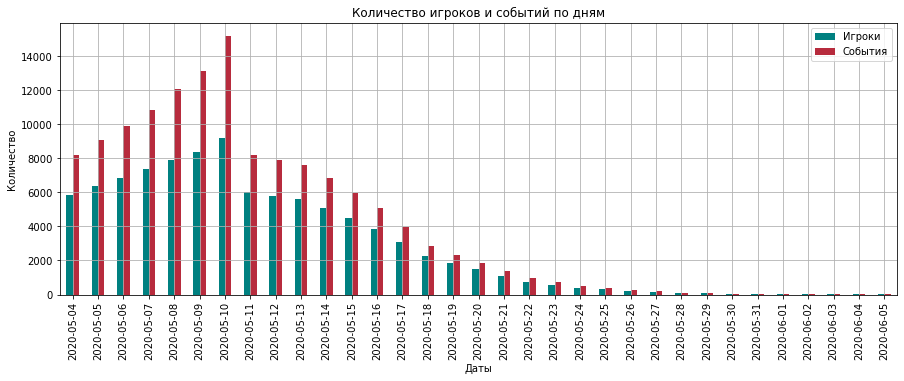

In [15]:
game_actions['date'] = game_actions['event_datetime'].dt.date
day_game_actions  = game_actions.groupby('date').agg(unique_users = ('user_id', 'nunique'),
event_count = ('event','count'))
day_game_actions .plot(kind='bar', figsize=(15, 5), color=['teal', '#b72b3d'], grid = True)
plt.title('Количество игроков и событий по дням')
plt.ylabel('Количество')
plt.xlabel('Даты')
plt.legend(['Игроки', 'События'])
plt.show()

In [16]:
display(day_game_actions.describe())

print('Среднее кол-во событий у игрока в день: ',
      round(day_game_actions['event_count'].mean()/day_game_actions['unique_users'].mean(),0) )

,unique_users,event_count
count,33.000000,33.000000
mean,2884.878788,4110.272727
std,3083.784493,4639.714311
min,4.000000,5.000000
25%,91.000000,118.000000
50%,1480.000000,1837.000000
75%,5776.000000,7918.000000
max,9219.000000,15207.000000


Среднее кол-во событий у игрока в день:  1.0


В датасете содержатся данные первых пользователей приложения — когорты пользователей, которые начали пользоваться приложением в период с 4 по 10 мая включительно, потому пик по количеству игроков и событий приходится на 10 мая. 
Кол-во событий после 10го мая идет на спад - игроки покидают игру либо завершают первый уровень. 
Ежедневно в среднем:

* в игру приходило 2885 игроков
* совершалось 4110 событий
* один игрок совершал 1 событие

Проверим датасет с тратами на рекламу:

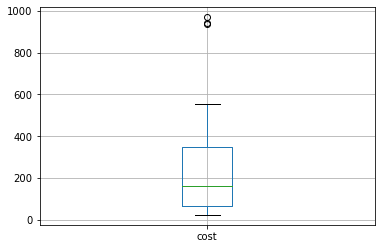

In [17]:
costs.boxplot();

Явно выделяются траты больше 800, посмотрим, что это:

In [18]:
costs.query('cost>800')

,source,day,cost
0,facebook_ads,2020-05-03,935.882786
7,instagram_new_adverts,2020-05-03,943.204717
14,yandex_direct,2020-05-03,969.139394


In [19]:
np.percentile(costs['cost'], [95, 99])

array([940.64204145, 962.13703127])

Так как 4 мая - был первый день рекламных кампаний, оплаты третьего числа - это авансовые оплаты, не будем считать их аномалиями.

#### Работа с пропусками и аномалиями

Согласно логике механики сбора данных - ненормальными будут пропуски в событиях:
* объект построен/тип объекта
* проект завершен/тип проекта

In [20]:
q = game_actions.groupby(['event'], as_index=False).count()
display(q)
print('Количество строк без пропусков',q['event_datetime'].sum())
print('Количество строк в таблице всего', len(game_actions))

,event,event_datetime,building_type,user_id,project_type,date
0,building,127956,127956,127956,0,127956
1,finished_stage_1,5817,0,5817,0,5817
2,project,1866,0,1866,1866,1866


Количество строк без пропусков 135639
Количество строк в таблице всего 135639


Мы видим, что 
* объект построен/тип объекта - пропуск в типе проекта
* проект завершен/тип проекта - пропуск в типе объекта
* уровень завершен - пропуски в типе объекта и проекта
Это соответствует логике механики сбора данных.

В данных нет не нормальных пропусков и аномалий.

### Шаг 3. Исследовательский анализ данных

####  Анализ рекламных источников по количеству новых пользователей

Смерджим датасеты:

In [21]:
users = game_actions.merge(user_sourse, on = 'user_id')
users.head()

,event_datetime,event,building_type,user_id,project_type,date,source
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,2020-05-04,youtube_channel_reklama
1,2020-05-05 05:20:15,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,2020-05-05,youtube_channel_reklama
2,2020-05-05 19:24:02,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,2020-05-05,youtube_channel_reklama
3,2020-05-05 20:59:19,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,2020-05-05,youtube_channel_reklama
4,2020-05-06 00:52:56,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,2020-05-06,youtube_channel_reklama


Посчитаем долю уникальных пользователей по каждому источнику:

In [22]:
sourse_fraction = users.groupby('source', 
                as_index = False).agg(unique_users = 
                            ('user_id','nunique')).sort_values(by = 'unique_users').reset_index(drop=True) 
sourse_fraction['fraction %'] = round(sourse_fraction['unique_users']/sourse_fraction['unique_users'].sum()*100,2)
sourse_fraction

,source,unique_users,fraction %
0,youtube_channel_reklama,2686,19.78
1,facebook_ads,2726,20.08
2,instagram_new_adverts,3347,24.65
3,yandex_direct,4817,35.48


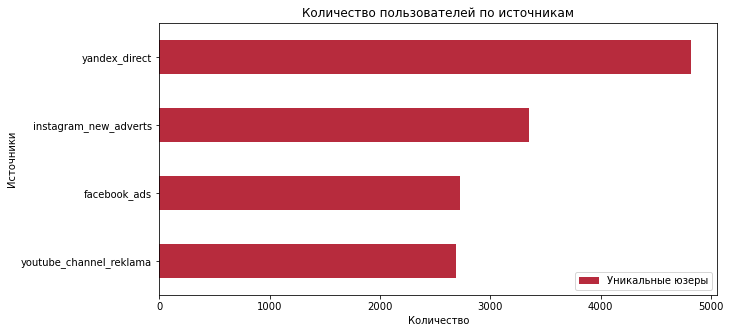

In [23]:
sourse_fraction.plot(kind='barh', y = 'unique_users',x = 'source',figsize=(10, 5), color = '#b72b3d')
plt.title('Количество пользователей по источникам')   
plt.ylabel('Источники')
plt.xlabel('Количество')
plt.legend(['Уникальные юзеры'])
plt.show()

Итак, больше всего пользователей пришло с яндекс директа, меньше всего с ютуб канала. Посмотрим приход новых пользователей в разбивке по дням:

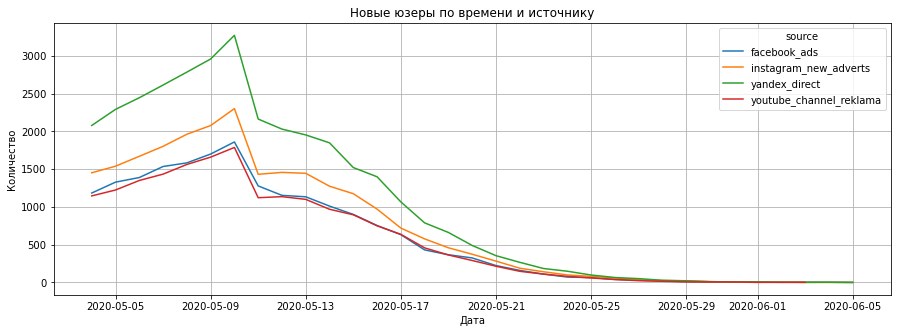

In [24]:
users.pivot_table(index='date', columns='source', 
                  values='user_id', aggfunc='nunique').plot(figsize=(15, 5), grid=True,label='Каналы', legend=True)
plt.title('Новые юзеры по времени и источнику')
plt.xlabel('Дата')
plt.ylabel('Количество')
plt.show();

У рекламных источников одинаковые периоды пиков и спадов и разница между количеством новых пользователей на протяжении всего времени держится примерно на одном уровне (никаких всплесков и падений не наблюдается). Лучше всего показал себя яндекс директ, на втором месте инстаграм, на третьем почти на равне ютуб и фейсбук.

####  Анализ рекламных источников по затратам

In [25]:
cac_source = costs.groupby('source', as_index=False).sum().sort_values(by = 'cost').reset_index(drop=True) 
cac_source

,source,cost
0,youtube_channel_reklama,1068.119204
1,facebook_ads,2140.904643
2,instagram_new_adverts,2161.441691
3,yandex_direct,2233.111449


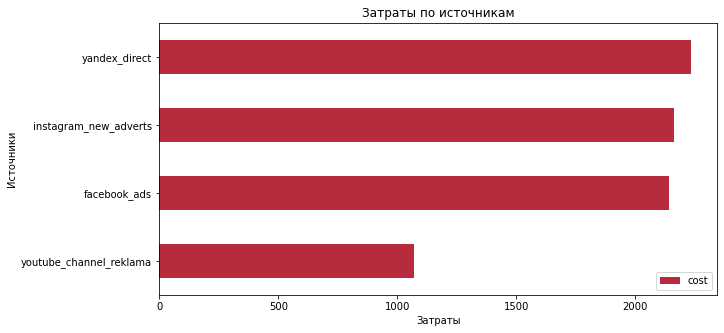

In [26]:
cac_source.plot(kind='barh', y = 'cost',x = 'source',figsize=(10, 5), color = '#b72b3d')
plt.title('Затраты по источникам')   
plt.ylabel('Источники')
plt.xlabel('Затраты')
plt.show()

Посмотрим на затраты в распределении по времени:

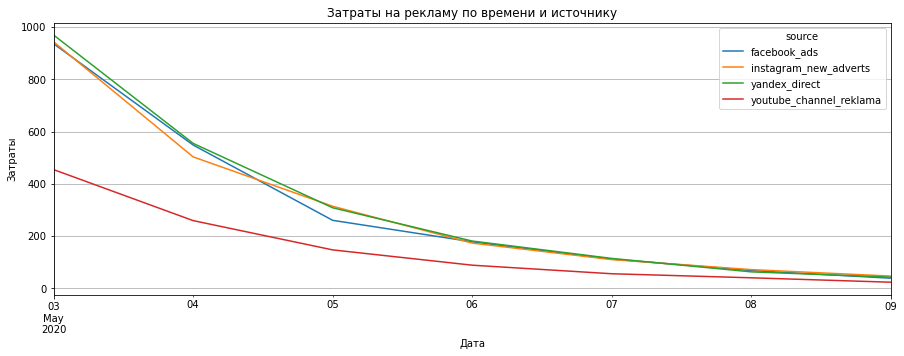

In [27]:
costs.pivot_table(
        index='day', columns='source', values='cost', aggfunc='sum'
    ).plot(figsize=(15, 5), grid=True,label='Каналы', legend=True)
plt.title('Затраты на рекламу по времени и источнику')
plt.xlabel('Дата')
plt.ylabel('Затраты')
plt.show();

ФБ, инстаграм и яндекс по затратам были наравне, на ютуб затрачено намного меньше средств. Посчитаем среднюю стоимость нового юзера по источникам:

In [28]:
cac = sourse_fraction.merge(cac_source, on = 'source')
cac['c_mean'] = round(cac['cost']/cac['unique_users'],2)
cac = cac.sort_values(by='c_mean', ascending = False).reset_index(drop=True)  
cac

,source,unique_users,fraction %,cost,c_mean
0,facebook_ads,2726,20.08,2140.904643,0.79
1,instagram_new_adverts,3347,24.65,2161.441691,0.65
2,yandex_direct,4817,35.48,2233.111449,0.46
3,youtube_channel_reklama,2686,19.78,1068.119204,0.40


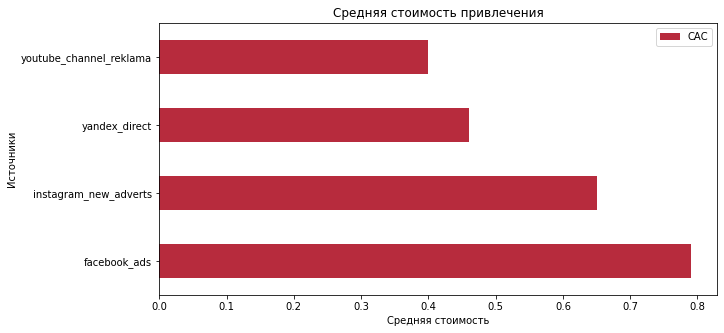

In [29]:
cac.plot(kind='barh', y = 'c_mean',x = 'source',figsize=(10, 5), color = '#b72b3d')
plt.title('Средняя стоимость привлечения')   
plt.ylabel('Источники')
plt.xlabel('Средняя стоимость')
plt.legend(['САС'])
plt.show()


1. Самый дешевый источник - ютуб, (на последнем месте по количеству новых пользователей)
2. На втором месте яндекс директ(лидер по количеству новых пользователей) 
3. На третьем месте  - инстаграм (второй по количеству новых пользователей)
4. Аутсайдер - фейсбук (самый дорогой и на предпоследнем месте по количеству новых клиентов после ютуба)

#### Анализ рекламных источников по способу прохождения уровня

In [30]:
finish = users.query('event == "finished_stage_1"')
pve = users.query('event == "project"')
print('Доля завершивших уровень: ',round(finish.user_id.nunique()/users.user_id.nunique()*100,2))

Доля завершивших уровень:  42.85


In [31]:
print('Количество игроков, победивших через реализацию проекта: ',pve.user_id.nunique())
print('Количество игроков, победивших через победу над другим игроком: ',finish.user_id.nunique() - pve.user_id.nunique())
print('Победивших игроков всего: ', finish.user_id.nunique())

Количество игроков, победивших через реализацию проекта:  1866
Количество игроков, победивших через победу над другим игроком:  3951
Победивших игроков всего:  5817


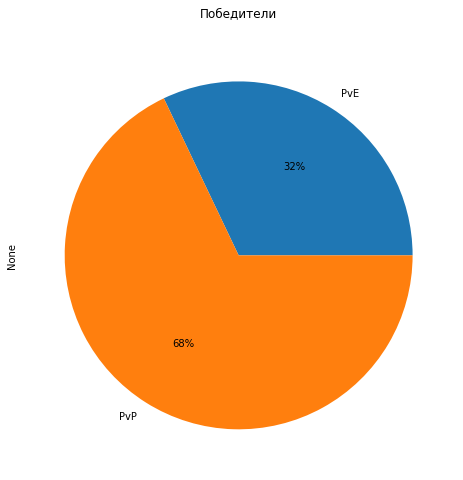

In [32]:
p = users.groupby(['event']).count().reset_index()
a = p.user_id[1]
b = p.user_id[2]
c = a-b
pie = pd.Series( [b,c], index=['PvE', 'PvP'])
pie.plot(kind='pie', y='pie',autopct='%1.0f%%',figsize=(8,8))
plt.title('Победители'+ "\n");

Тех, кто одержал победу над другим игроком (68%), это почти в два раза больше, чем тех, кто победил с помощью реализации проекта (32%).

Cоздадим профиль пользователя:

In [33]:
def get_profiles(finish, users, pve):
    profiles = (
        users.sort_values(by=['user_id', 'event_datetime'])
        .groupby('user_id')
        .agg({'event_datetime': 'first',
             'source': 'first'})
        .rename(columns={'event_datetime': 'first_ts'})
        .reset_index() ) 

    # определяем дату первого посещения
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['finish'] = profiles['user_id'].isin(finish['user_id'].unique())
    profiles['type_of_finish'] = profiles['user_id'].isin(pve['user_id'].unique())
    profiles = profiles.replace({"type_of_finish": {True: "PvE", False: "PvP"}})
    return profiles

profiles = get_profiles(finish, users,pve)
profiles.head() 

,user_id,first_ts,source,dt,finish,type_of_finish
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,2020-05-06 01:07:37,facebook_ads,2020-05-06,False,PvP
1,00151b4f-ba38-44a8-a650-d7cf130a0105,2020-05-06 03:09:12,yandex_direct,2020-05-06,False,PvP
2,001aaea6-3d14-43f1-8ca8-7f48820f17aa,2020-05-05 18:08:52,youtube_channel_reklama,2020-05-05,False,PvP
3,001d39dc-366c-4021-9604-6a3b9ff01e25,2020-05-05 21:02:05,instagram_new_adverts,2020-05-05,True,PvP
4,002f508f-67b6-479f-814b-b05f00d4e995,2020-05-05 13:49:58,facebook_ads,2020-05-05,False,PvP


Проверяем, что все ок:

In [34]:
profiles.groupby('finish', 
                as_index=False).agg(unique_users = ('user_id',
                                'nunique')).sort_values(by = 'unique_users', ascending = False).reset_index(drop=True)

,finish,unique_users
0,False,7759
1,True,5817


In [35]:
profiles_finish = profiles.query('finish==True')
profiles_finish.type_of_finish.value_counts() 

PvP    3951
PvE    1866
Name: type_of_finish, dtype: int64

Посчитаем конверсию по источникам:

In [36]:
winners = profiles_finish.groupby(['source'], as_index=False).agg(finish_users = ('user_id',
                                'nunique'))
all_users = profiles.groupby(['source'], as_index=False).agg(all_users = ('user_id',
                                'nunique'))
cr = winners.merge(all_users, on = 'source')
cr['cr'] = round(cr['finish_users']/cr['all_users']*100,2) 
cr.sort_values(by = 'cr', ascending = False).reset_index(drop=True)

,source,finish_users,all_users,cr
0,instagram_new_adverts,1466,3347,43.80
1,youtube_channel_reklama,1159,2686,43.15
2,yandex_direct,2042,4817,42.39
3,facebook_ads,1150,2726,42.19


Конверсия выше всего у пользователей инстаграма и ютуб, на третьем месте яндекс директ и на последнем фейсбук.

Посмотрим на кол-во победителей PvP, PvE в разбивке по каналам:

Посмотрим на кол-во победителей PvP, PvE в разбивке по каналам:

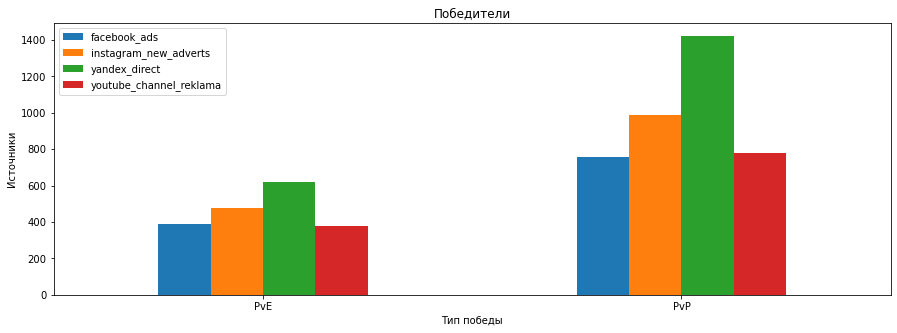

In [37]:
profiles_finish.pivot_table(index='type_of_finish', columns = 'source', values=['user_id'], 
                            aggfunc = ['count']).plot(kind="bar", figsize=(15, 5))
plt.title('Победители')   
plt.ylabel('Источники')
plt.xlabel('Тип победы')
plt.legend(['facebook_ads','instagram_new_adverts', 'yandex_direct', 'youtube_channel_reklama'])
plt.xticks(rotation=0)
plt.show()

Игроки PvP и PvE распределены примерно в равнозначных долях по источникам. Проверим распределение в процентах:

In [38]:
pvp = profiles_finish.query('type_of_finish=="PvP"')
pvp_gr = pvp.groupby(['source'], as_index=False).agg(finish_users = ('user_id',
                                'nunique')).sort_values(by = 'finish_users').reset_index(drop=True)
pvp_gr['fraction'] = round(pvp_gr.finish_users/pvp.user_id.nunique()*100,2) 
print('PvP игроки')
display(pvp_gr)
print()
pve = profiles_finish.query('type_of_finish=="PvE"')
pve_gr = pve.groupby(['source'], as_index=False).agg(finish_users = ('user_id',
                                'nunique')).sort_values(by = 'finish_users').reset_index(drop=True)
pve_gr['fraction'] = round(pve_gr.finish_users/pve.user_id.nunique()*100,2)  
print('PvE игроки')
display(pve_gr)

PvP игроки


,source,finish_users,fraction
0,facebook_ads,759,19.21
1,youtube_channel_reklama,780,19.74
2,instagram_new_adverts,990,25.06
3,yandex_direct,1422,35.99



PvE игроки


,source,finish_users,fraction
0,youtube_channel_reklama,379,20.31
1,facebook_ads,391,20.95
2,instagram_new_adverts,476,25.51
3,yandex_direct,620,33.23


Действительно, распределерние игроков PvP и PvE по рекламным каналам отличается не более, чем на 2.7 п.п.  
Посмотрим на конверсии в зависимости от способа прохождения уровня:

In [39]:
pvp_gr_1 = pvp_gr.drop(['fraction'], axis=1)
pvp_cr = all_users.merge(pvp_gr_1, on = 'source')
pvp_cr['CR'] = round(pvp_cr['finish_users']/ pvp_cr['all_users']*100,2)
pvp_cr = pvp_cr.sort_values(by = 'CR', ascending = False)
print('PvP CR')
display(pvp_cr) 
print('Средняя конверсия: ', round(pvp_cr['CR'].mean(),2) )
print()
pve_gr_1 = pve_gr.drop(['fraction'], axis=1)
pve_cr = all_users.merge(pve_gr_1, on = 'source')
pve_cr['CR'] = round(pve_cr['finish_users']/ pvp_cr['all_users']*100,2)
pve_cr = pve_cr.sort_values(by = 'CR', ascending = False)
print('PvE CR')
display(pve_cr) 
print('Средняя конверсия: ', round(pve_cr['CR'].mean(),2) ) 

PvP CR


,source,all_users,finish_users,CR
1,instagram_new_adverts,3347,990,29.58
2,yandex_direct,4817,1422,29.52
3,youtube_channel_reklama,2686,780,29.04
0,facebook_ads,2726,759,27.84


Средняя конверсия:  28.99

PvE CR


,source,all_users,finish_users,CR
0,facebook_ads,2726,391,14.34
1,instagram_new_adverts,3347,476,14.22
3,youtube_channel_reklama,2686,379,14.11
2,yandex_direct,4817,620,12.87


Средняя конверсия:  13.88


**Вывод**:

* Победивших игроков всего:  5817

* Количество игроков, победивших через реализацию проекта:  1866 (32%)

* Количество игроков, победивших через победу над другим игроком:  3951 (68%)

* Игроки PvP и PvE распределены примерно в равнозначных долях по источникам

* Конверсия по каналам:

1. Инстаграм  - 43.8%

2. Ютуб 43.15%

3. Яндекс (42.39)

4. ФБ 42.19% 

Если смотреть в разбивке по способу игры, увидим другую картину:

* Конверсия у игроков PvP намного выше, чем у игроков PvE (28.9% против 13.8%)

В PvP лидер инстаграм, аутсайдер  - ФБ.

В PvE лидер - фейсбук, аутсайдер - Яндекс. 

 

#### Анализ рекламных источников по количеству построенных объектов

Посмотрим сколько всего строится зданий игроками.

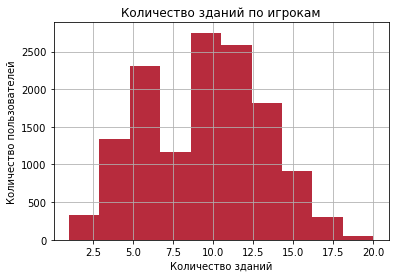

In [40]:
building = users.groupby('user_id').agg(unique_users = ('user_id',
                                'nunique'), building_count = ('building_type','count'))
plt.hist(building['building_count'],color = '#b72b3d')
plt.title('Количество зданий по игрокам')
plt.xlabel('Количество зданий')
plt.ylabel('Количество пользователей')
plt.grid()
plt.show()

In [41]:
np.percentile(building['building_count'], [95, 99])

array([16., 18.])

У 1% пользователей - больше 18 зданий и у 5% - больше 16.

Проанализируем с распределением по источникам:

In [42]:
building_count = users.groupby('source', 
                as_index=False).agg(unique_users = ('user_id',
                                'nunique'), building_count = ('building_type','count')).sort_values(by = 
                                                                    'unique_users', ascending = False).reset_index(drop=True)
building_count['mean'] = round(building_count['building_count']/ building_count['unique_users'],2) 
building_count 

,source,unique_users,building_count,mean
0,yandex_direct,4817,45032,9.35
1,instagram_new_adverts,3347,31815,9.51
2,facebook_ads,2726,26131,9.59
3,youtube_channel_reklama,2686,24978,9.30


Несмотря на то, что по общему количеству зданий явно выделяется яндекс.директ( за счет большего количества пользователей), если смотреть на среднее количество зданий на игрока, то первое место делят инстаграм и фб (по 10 зданий на игрока). Посмотрим количество зданий в зависимости от стратегии игры:

In [43]:
pvp_b = users.merge(pvp, on = 'user_id')
pve_b = users.merge(pve, on = 'user_id')

In [44]:
building_pvp = pvp_b.groupby('source_x', 
                as_index=False).agg(unique_users = ('user_id',
                                'nunique'), building_count = ('building_type','count')).sort_values(by = 
                                                                    'unique_users', ascending = False).reset_index(drop=True)

building_pvp['mean'] = round(building_pvp['building_count']/ building_pvp['unique_users'],2)
print('Игроки PvP')
display(building_pvp)

building_pve = pve_b.groupby('source_x', 
                as_index=False).agg(unique_users = ('user_id',
                                'nunique'), building_count = ('building_type','count')).sort_values(by = 
                                                                    'unique_users', ascending = False).reset_index(drop=True)

building_pve['mean'] = round(building_pve['building_count']/ building_pve['unique_users'],2)
print('Игроки PvE')
display(building_pve)

Игроки PvP


,source_x,unique_users,building_count,mean
0,yandex_direct,1422,13332,9.38
1,instagram_new_adverts,990,9306,9.40
2,youtube_channel_reklama,780,7390,9.47
3,facebook_ads,759,7157,9.43


Игроки PvE


,source_x,unique_users,building_count,mean
0,yandex_direct,620,7809,12.60
1,instagram_new_adverts,476,6072,12.76
2,facebook_ads,391,4946,12.65
3,youtube_channel_reklama,379,4774,12.60


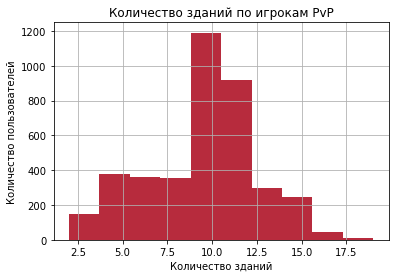

In [45]:
b1 = pvp_b.groupby(['source_x', 'user_id'], as_index=False).agg(building_count = ('building_type','count'))
plt.hist(b1['building_count'],color = '#b72b3d')
plt.title('Количество зданий по игрокам PvP')
plt.xlabel('Количество зданий')
plt.ylabel('Количество пользователей')
plt.grid()
plt.show()

In [46]:
np.percentile(b1['building_count'], [95, 99])

array([14., 16.])

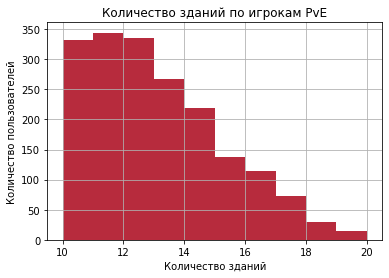

In [47]:
b2 = pve_b.groupby(['source_x', 'user_id'], as_index=False).agg(building_count = ('building_type','count'))
plt.hist(b2['building_count'],color = '#b72b3d')
plt.title('Количество зданий по игрокам PvE')
plt.xlabel('Количество зданий')
plt.ylabel('Количество пользователей')
plt.grid()
plt.show()

In [48]:
np.percentile(b2['building_count'], [95, 99])

array([17., 18.])

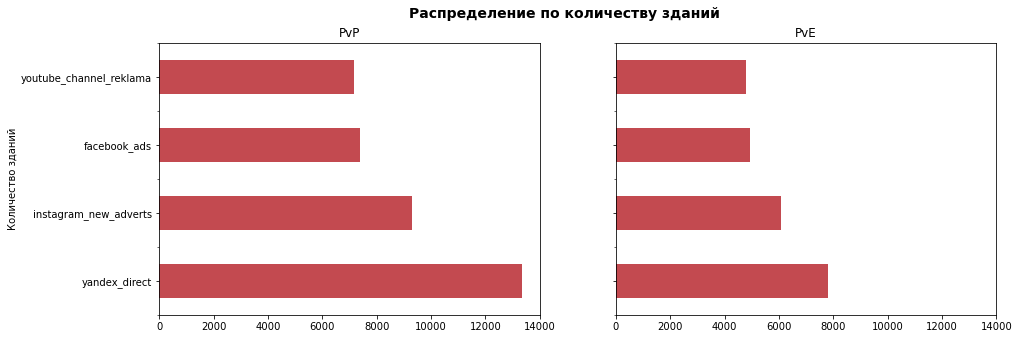

In [49]:
fig, (ax1, ax2)= plt.subplots(nrows=1,ncols=2, sharey=True, figsize=(15, 5))

# pvp
building_pvp.plot(kind='barh', color = '#c34a50', y="building_count", x="source_x", ax=ax1)
ax1.set(title='PvP', ylabel='Количество зданий')
ax1.get_legend().remove()
ax1.set_xlim([0, 14000])

# pve
building_pve.plot(kind='barh', color = '#c34a50', y="building_count", x="source_x", ax=ax2)
ax2.set(title='PvE',  ylabel='Количество зданий')
ax2.get_legend().remove()
ax2.set_xlim([0, 14000])
# Заголовок 
fig.suptitle('Распределение по количеству зданий', fontsize=14, fontweight='bold'); 

На каждого игрока  PvE в среднем приходится 13 зданий, в то время как в pvp - 9. 

При этом, так как игроков pvp намного больше, то и зданий у них больше.

#### Анализ рекламных источников по времени прохождения уровня

Вычислим последнее действие каждого юзера, а затем посчитаем время прохождения уровня:

In [50]:
lf = users.sort_values(by=['user_id',
                'event_datetime']).groupby('user_id').agg({'event_datetime':'last'}).rename(columns=
                                                                {'event_datetime': 'last_ts'}).reset_index() 
lf['dt_last'] = lf['last_ts'].dt.date

lifetime_all = profiles.merge(lf[['user_id', 'dt_last']], on='user_id', how='left')
lifetime_all['lifetime'] = (lifetime_all['dt_last'] - lifetime_all['dt']).dt.days 
lifetime_all.head()
lifetime_all['lifetime'].describe()


count    13576.000000
mean        10.629862
std          4.360623
min          0.000000
25%          8.000000
50%         10.000000
75%         13.000000
max         31.000000
Name: lifetime, dtype: float64

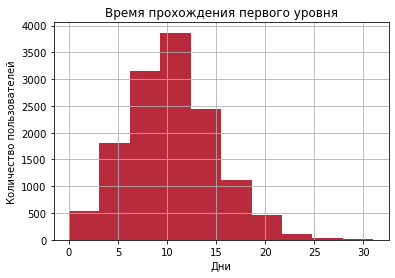

In [51]:
plt.hist(lifetime_all['lifetime'],color = '#b72b3d')
plt.title('Время прохождения первого уровня')
plt.xlabel('Дни')
plt.ylabel('Количество пользователей')
plt.grid()
plt.show()

In [52]:
np.percentile(lifetime_all['lifetime'], [95, 99])

array([18., 22.])

In [53]:
lifetime_all.describe()  

,lifetime
count,13576.000000
mean,10.629862
std,4.360623
min,0.000000
25%,8.000000
50%,10.000000
75%,13.000000
max,31.000000


Мы видим, что есть юзеры, кто прошел игру и прошел ее в тот же день или отвалился, в среднем первый уровень проходят за 10 дней. Посмотрим времч прохождения уровня в разбивке по каналам и способу игры:

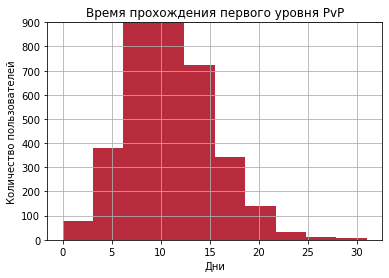

In [54]:
lifetime_finish = lifetime_all.query('finish==True')
lifetime_pvp = lifetime_finish.query('type_of_finish=="PvP"')
plt.hist(lifetime_pvp['lifetime'],color = '#b72b3d')
plt.title('Время прохождения первого уровня PvP')
plt.ylim([0, 900])
plt.xlabel('Дни')
plt.ylabel('Количество пользователей')
plt.grid()
plt.show()

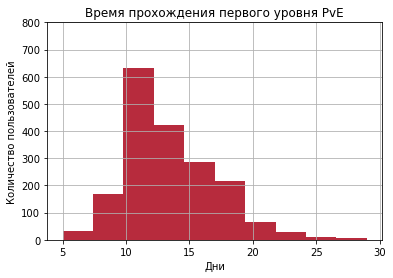

In [55]:
lifetime_pve = lifetime_finish.query('type_of_finish=="PvE"')
plt.hist(lifetime_pve['lifetime'],color = '#b72b3d')
plt.title('Время прохождения первого уровня PvE')
plt.xlabel('Дни')
plt.ylabel('Количество пользователей')
plt.ylim([0, 800])
plt.grid()
plt.show()

In [56]:
lifetime_finish.groupby(['type_of_finish','source']).agg(users = ('user_id','count'), 
                                                             mean_lifitime = ('lifetime', 'mean')).reset_index()


,type_of_finish,source,users,mean_lifitime
0,PvE,facebook_ads,391,13.345269
1,PvE,instagram_new_adverts,476,13.468487
2,PvE,yandex_direct,620,13.319355
3,PvE,youtube_channel_reklama,379,13.485488
4,PvP,facebook_ads,759,10.996047
5,PvP,instagram_new_adverts,990,11.068687
6,PvP,yandex_direct,1422,11.075949
7,PvP,youtube_channel_reklama,780,11.074359


Распределение длительности прохождения уровня стремится к нормальному в обеих группах. 
В среднем игроки PvE проходят уровень дольше, чем игроки PvP вне зависимости от источника.

#### Ранжирование каналов привлечения

Создадим общий датафрейм с признаками по каналам.

In [57]:
# кол-во новых пользователей
sourse_fraction.rename(columns = {'unique_users':' new_users'}, inplace = True )
new_users = sourse_fraction.drop(['fraction %'], axis=1)
new_users

,source,new_users
0,youtube_channel_reklama,2686
1,facebook_ads,2726
2,instagram_new_adverts,3347
3,yandex_direct,4817


In [58]:
# расходы на привлечение
new_cac = cac.drop(['unique_users'], axis=1)
new_cac

,source,fraction %,cost,c_mean
0,facebook_ads,20.08,2140.904643,0.79
1,instagram_new_adverts,24.65,2161.441691,0.65
2,yandex_direct,35.48,2233.111449,0.46
3,youtube_channel_reklama,19.78,1068.119204,0.40


In [59]:
# средний лайфтайм
lf_1 = lifetime_finish.groupby(['source']).agg(mean_lifitime = ('lifetime', 'mean')).reset_index()
lf_1

,source,mean_lifitime
0,facebook_ads,11.794783
1,instagram_new_adverts,11.847885
2,yandex_direct,11.757101
3,youtube_channel_reklama,11.862813


In [60]:
# конверсия
cr_new = cr.drop(['all_users'],axis=1)
cr

,source,finish_users,all_users,cr
0,facebook_ads,1150,2726,42.19
1,instagram_new_adverts,1466,3347,43.80
2,yandex_direct,2042,4817,42.39
3,youtube_channel_reklama,1159,2686,43.15


In [61]:
# кол-во построенных объектов
building_count.rename(columns = {'mean':'mean_building_count'}, inplace = True )
buildings = building_count.drop(['unique_users'],axis=1)
buildings

,source,building_count,mean_building_count
0,yandex_direct,45032,9.35
1,instagram_new_adverts,31815,9.51
2,facebook_ads,26131,9.59
3,youtube_channel_reklama,24978,9.30


In [62]:
df = new_users.merge(new_cac,on ='source').merge(lf_1, on='source').merge(cr, on='source').merge(buildings, on='source')
df

,source,new_users,fraction %,cost,c_mean,mean_lifitime,finish_users,all_users,cr,building_count,mean_building_count
0,youtube_channel_reklama,2686,19.78,1068.119204,0.40,11.862813,1159,2686,43.15,24978,9.30
1,facebook_ads,2726,20.08,2140.904643,0.79,11.794783,1150,2726,42.19,26131,9.59
2,instagram_new_adverts,3347,24.65,2161.441691,0.65,11.847885,1466,3347,43.80,31815,9.51
3,yandex_direct,4817,35.48,2233.111449,0.46,11.757101,2042,4817,42.39,45032,9.35


In [63]:
cm = sns.light_palette("green", as_cmap=True)

df.style.background_gradient(cmap=cm)  

,source,new_users,fraction %,cost,c_mean,mean_lifitime,finish_users,all_users,cr,building_count,mean_building_count
0,youtube_channel_reklama,2686,19.780000,1068.119204,0.400000,11.862813,1159,2686,43.150000,24978,9.300000
1,facebook_ads,2726,20.080000,2140.904643,0.790000,11.794783,1150,2726,42.190000,26131,9.590000
2,instagram_new_adverts,3347,24.650000,2161.441691,0.650000,11.847885,1466,3347,43.800000,31815,9.510000
3,yandex_direct,4817,35.480000,2233.111449,0.460000,11.757101,2042,4817,42.390000,45032,9.350000


**Вывод** 

* Новые юзеры: лидер Яндекс и инстаграм, аутсайдер - ютуб

* Средняя стоимость игрока: самая дешевая- у яндекс и ютуб, самая дорогая - у фейсбука и инстаграма

* Время прохождения уровня у всех примерно одинаково

* Конверсия - лучшая инстаграма и ютуба, худшая у фейсбука.

* Количество зданий больше всех у яндекса и инстаграма(много игроков), хотя по средним показателям у яндекса и ютуба - на 1 меньше, чем у остальных

Нет смысла вкладываться много в дорогой фейсбук с плохой конверсией - у ютуба в два раза дешевле стоимость привлечения и высокая конверсия. Ранжирование каналов по важности:

* 1.яндекс

* 2.инстаграм 

* 3.ютуб

* 4.фейсбук

### Шаг 4. Проверка статистических гипотез

#### 4.2. Проверка гипотезы 1: Время завершения уровня различается в зависимости от способа прохождения:
   
##### - через реализацию проекта,
##### - через победу над первым игроком.

Для проверки гипотезы мы можем использовать t-критерий Стьюдента:

H0: различие в средней длительности прохождения уровня в обеих группах статистически незначима

H1: различие в средней длительности прохождения уровня в группах PvP и PvE статистически значимо

In [64]:
alpha = 0.01
pvalue = stats.ttest_ind(lifetime_pve['lifetime'], lifetime_pvp['lifetime']).pvalue

print('p-value: {}'.format(pvalue))
if pvalue >= alpha: 
    print("Не получилось отвергнуть нулевую гипотезу")
else:
    print("Отвергаем нулевую гипотезу")
print()
print('Среднее время прохождения уровня у игроков PvP: ', lifetime_pvp['lifetime'].mean()) 
print('Среднее время прохождения уровня у игроков PvE: ', lifetime_pve['lifetime'].mean()) 

p-value: 4.363370007994992e-96
Отвергаем нулевую гипотезу

Среднее время прохождения уровня у игроков PvP:  11.0584662110858
Среднее время прохождения уровня у игроков PvE:  13.396570203644158


Различие в средней длительности прохождения уровня в группах PvP и PvE статистически значимо.

####  Проверка гипотезы 2: Количество построенных объектов различается в зависимости от способа прохождения:
   
##### - через реализацию проекта,
##### - через победу над первым игроком.

Для проверки гипотезы мы будем использовать t-критерий Стьюдента с параметром equal_var (так как имеем не нормальное распределениe).

H0: различие в среднем количестве построенных объектов в обеих группах статистически незначимо

H1: различие в среднем количестве построенных объектов в обеих группах статистически значимо

In [65]:
alpha = 0.01
pvalue = stats.ttest_ind(b1['building_count'], b1['building_count'], equal_var = False).pvalue

print('p-value: {}'.format(pvalue))
if pvalue >= alpha: 
    print("Не получилось отвергнуть нулевую гипотезу")
else:
    print("Отвергаем нулевую гипотезу")
print()
print('Среднее количество зданий на игрока PvP: ', b1['building_count'].mean()) 
print('Среднее количество зданий на игрока PvE: ', b2['building_count'].mean()) 

p-value: 1.0
Не получилось отвергнуть нулевую гипотезу

Среднее количество зданий на игрока PvP:  9.411541381928625
Среднее количество зданий на игрока PvE:  12.64790996784566


Различие в среднем количестве построенных объектов в обеих группах статистически незначимо

### Шаг 5.  Выводы и рекомендации

Мы изучили данные, проверили их на пропуски и аномалии. И выявили следующее:

Игроков, завершивших уровень всего: 5817

Количество игроков, победивших через реализацию проекта: 1866 (32%)

Количество игроков, победивших через победу над другим игроком: 3951 (68%)

Игроки PvP и PvE распределены примерно в равнозначных долях по источникам

* Активность в игре

Ежедневно в среднем:

* в игру приходило 2885 игроков
* совершалось 4110 событий
* один игрок совершал 1 событие

У рекламных источников одинаковые периоды пиков и спадов и разница между количеством новых пользователей на протяжении всего времени держится примерно на одном уровне (никаких всплесков и падений не наблюдается).

* Конверсия по каналам:

* Инстаграм - 43.8%

* Ютуб 43.15%

* Яндекс (42.39)

* ФБ 42.19%

Если смотреть в разбивке по способу игры, увидим другую картину:

* Конверсия у игроков PvP намного выше, чем у игроков PvE (28.9% против 13.8%)

* В PvP лидер инстаграм, аутсайдер - ФБ.

* В PvE лидер - фейсбук, аутсайдер - Яндекс.


* Новые юзеры: лидер Яндекс и инстаграм, аутсайдер - ютуб

* Средняя стоимость игрока: самая дешевая- у яндекс и ютуб, самая дорогая - у фейсбука и инстаграма

* Время прохождения уровня у всех примерно одинаково


Основная монетизация игры — только планируется. Но предполагается, что в приложении будет происходить показ рекламы на экране с выбором типа объекта для постройки. Потому - важно-сколько зданий строят объекты  

* Количество зданий больше всех у яндекса и инстаграма(много игроков)
* Средние показатели: у инстаграма и фейсбука больше, чем у ютуда и яндекса.


Мы проверили следующие гипотезы:
Время завершения уровня различается в зависимости от способа прохождения:
- через реализацию проекта,
- через победу над первым игроком.
По результатам теста выявили статистическую значимость различий. Игроки PvP проходят уровень быстрее.

2: Количество построенных объектов различается в зависимости от способа прохождения:
- через реализацию проекта,
- через победу над первым игроком.
По результатам теста не выявили статистическую значимость различий между количеством зданий у игроков PvP и PvE/


Нет смысла вкладываться много в дорогой фейсбук с плохой конверсией - у ютуба в два раза дешевле стоимость привлечения, но схожие с фб показатели конверсии и кол-ва зданий. Стоит продолжать развивать яндекс, инстаграм и ютуб.